RBD 3.73780703545
FT 0.0849599838257
MBD 0.742645025253


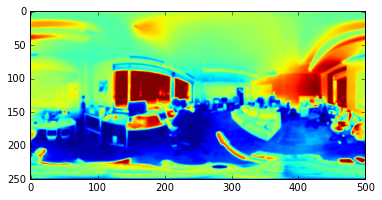

In [21]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import time

import os, json, sys
sys.path.append("../../../../../resources/pyimgsaliency/")
import pyimgsaliency as psal

# test saliency detection
demo_img = "../../../../../resources/pyimgsaliency/pyimgsaliency/bird.jpg"
demo_img = "video-frames/equation-2/00006.png"
start_time = time.time()
rbd = psal.get_saliency_rbd(demo_img).astype('uint8')
after_time = time.time()
print "RBD", after_time - start_time

start_time = time.time()
ft = psal.get_saliency_ft(demo_img).astype('uint8')
after_time = time.time()
print "FT", after_time - start_time
import scipy.misc
scipy.misc.toimage(ft).save("/Users/apavel/Desktop/meow.png")
plt.imshow(ft)



start_time = time.time()
rbd = psal.get_saliency_mbd(demo_img).astype('uint8')
after_time = time.time()
print "MBD", after_time - start_time

In [30]:
import scipy.misc
import subprocess
from PIL import Image

VIDEO_FRAMES_ROOT = "video-frames/"
ANALYSIS_ROOT = "analysis/image-saliency/"
VIDEO_ROOT = "videos/"

def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]

all_videos = [v for v in os.listdir(VIDEO_ROOT) if "small" not in v and v[0] !='.' if "arctic" not in v and "congo" not in v][6:]

for video in all_videos:
    base = video.lower().split(".mp4")[0]
    print "Processing video:", base
    video_path = VIDEO_ROOT + video
    video_frames_path = VIDEO_FRAMES_ROOT + base + "/"
    
    # delete any existing video frames
    sub_directory_paths = [VIDEO_FRAMES_ROOT + p + "/" for p in get_immediate_subdirectories(VIDEO_FRAMES_ROOT)]
    for d in sub_directory_paths: 
        for frame in os.listdir(d):
            os.remove(d + frame)
            
    # make a new directory
    if not os.path.exists(video_frames_path):
        os.mkdir(video_frames_path)
    
    start_time = time.time()
    
    # split the video into smaller video frames
    subprocess.call(["ffmpeg", "-i", video_path, "-vf", "scale=500:-1", video_frames_path + "%05d.png"])
    
    analysis_path = ANALYSIS_ROOT + base + "/"
    
    # make a new directory
    if not os.path.exists(analysis_path):
        os.mkdir(analysis_path)
    
    # ok now we actually want to just take 2 frames per second
    fns = [video_frames_path + fn for fn in os.listdir(video_frames_path) if ".png" in fn]
    new_fns = []
    for i in range(len(fns)): 
        fn = fns[i]
        if i % 15 == 0: 
            new_fns.append(fn)
    fns = new_fns
    
    for frame_fn in fns: 
        out_fn = analysis_path + frame_fn.split("/")[-1]
        sal_map = psal.get_saliency_mbd(frame_fn).astype('uint8')
        im = Image.fromarray(sal_map)
        im.save(out_fn)
        
    print "Time to process:", time.time() - start_time  

Processing video: nocuts
Time to process: 135.974681139
Processing video: probation-reg
Time to process: 374.073986053
Processing video: probation-shoulder
Time to process: 175.297437906
Processing video: steve-walking
Time to process: 64.6232562065
Processing video: toy-story-shoulder-2
Time to process: 147.845715046
Processing video: toy-story-shoulder
Time to process: 181.627819061
Processing video: toy-story
Time to process: 150.420390129


##### rbd